In [5]:
from bloc.BlocServer import BlocServer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
bs = BlocServer()

In [8]:
records = pd.read_sql_table('sprecord', con=bs.conn)
events = pd.read_sql_table('spevent', con=bs.conn)
markets = pd.read_sql_table('spmarket', con=bs.conn)
records.tail()

,recordid,source,marketid,runnerid,timestamputc,handicap,odds,stake,islay,isplaced,notes
94369,94370,betfair,10,39980,2019-08-04 05:23:59.154099,0.0,4.360,5.0,True,True,"{""botName"": ""marketmaker"", ""botParams"": {""spre..."
94370,94371,betfair,10,39980,2019-08-04 05:23:59.218545,0.0,4.040,5.0,False,True,"{""botName"": ""marketmaker"", ""botParams"": {""spre..."
94371,94372,betfair,10,39980,2019-08-04 05:23:59.218545,0.0,4.360,5.0,True,True,"{""botName"": ""marketmaker"", ""botParams"": {""spre..."
94372,94373,betfair,10,39991,2019-08-04 05:23:59.218545,0.0,1.304,5.0,False,True,"{""botName"": ""marketmaker"", ""botParams"": {""spre..."
94373,94374,betfair,10,39991,2019-08-04 05:23:59.218545,0.0,1.336,5.0,True,True,"{""botName"": ""marketmaker"", ""botParams"": {""spre..."


In [507]:
#records['ts'] = records['timestamputc'].apply(lambda x: x.timestamp())

In [9]:
markets.tail()

,marketid,eventid,markettype,runners,marketparameters,notes
5,6,3,HANDICAP,"{'39979': 'Hawthorn', '42153': 'Brisbane'}",{'source': {'betfair': {'marketid': '1.1595174...,
6,7,4,MATCH_ODDS,"{'217710': 'Port Adelaide Power', '5304641': '...",{'source': {'betfair': {'marketid': '1.1595184...,
7,8,5,MATCH_ODDS,"{'7337': 'Sri Lanka', '7659': 'Bangladesh'}",{'source': {'betfair': {'marketid': '1.1607779...,
8,9,6,MATCH_ODDS,"{'7797904': 'Lucas Miedler', '2283676': 'Carlo...",{'source': {'betfair': {'marketid': '1.1607889...,
9,10,7,MATCH_ODDS,"{'39980': 'Carlton', '39991': 'West Coast'}",{'source': {'betfair': {'marketid': '1.1595228...,


In [22]:
# Select a particular market
r = records.loc[(records.marketid==8) & (records.runnerid==7659) &  (records.handicap ==0)]

'''BBO = r.groupby(['timestamputc', 'marketid', 'handicap', 'runnerid', 'isplaced', 'islay'])['odds'].agg(['min','max'])

# Unstack multi-index
BBO = pd.DataFrame(BBO.to_records())
# Get best bids/offers
bestBids = BBO.loc[(~BBO.isplaced) & (~BBO.islay)  , ['timestamputc', 'max']].rename(columns = {'max': 'odds'})
bestAsks = BBO.loc[(~BBO.isplaced) & BBO.islay , ['timestamputc', 'min']].rename(columns={'min': 'odds'})


#marketBids = r.loc[~r.isplaced & ~r.islay]
#marketAsks = r.loc[~r.isplaced & r.islay]
myBids = r.loc[r.isplaced & ~r.islay]
myAsks = r.loc[r.isplaced & r.islay]
'''

r.head()

,recordid,source,marketid,runnerid,timestamputc,handicap,odds,stake,islay,isplaced,notes
45308,45309,betfair,8,7659,2019-07-28 08:57:36.257841,0.0,2.36,2019.66,True,False,
45309,45310,betfair,8,7659,2019-07-28 08:57:36.257841,0.0,2.38,12532.75,True,False,
45310,45311,betfair,8,7659,2019-07-28 08:57:36.257841,0.0,2.40,10516.95,True,False,
45311,45312,betfair,8,7659,2019-07-28 08:57:36.257841,0.0,2.32,2228.12,False,False,
45312,45313,betfair,8,7659,2019-07-28 08:57:36.257841,0.0,2.30,818.71,False,False,


In [23]:
# Pivot odds/stake for this market. Get best bid/offer and sum stake
z = r.loc[:, ['timestamputc', 'odds', 'stake', 'islay', 'isplaced']].pivot_table(
    index='timestamputc', columns=['islay','isplaced'], values=['odds','stake'],
    aggfunc={'odds':['min','max'], 'stake':'sum'})
z.head()

odds                                         \
                             max                       min                
islay                      False        True         False        True    
isplaced                   False  True  False  True  False  True  False   
timestamputc                                                              
2019-07-28 08:57:36.257841  2.32    NaN  2.40    NaN  2.28    NaN  2.36   
2019-07-28 08:57:51.146858  2.32    NaN  2.40    NaN  2.28    NaN  2.36   
2019-07-28 08:57:51.645257   NaN  2.324   NaN  2.356   NaN  2.324   NaN   
2019-07-28 08:58:03.845392  2.36    NaN  2.42    NaN  2.32    NaN  2.38   
2019-07-28 08:58:04.348421   NaN  2.362   NaN  2.378   NaN  2.362   NaN   

                                      stake                        
                                        sum                        
islay                                 False           True         
isplaced                    True      False True      False True   
timestamputc                                                       
2019-07-28 08:57:36.257841    NaN   3849.58   NaN  25069.36   NaN  
2019-07-28 08:57:51.146858    NaN   5771.27   NaN  19668.91   NaN  
2019-07-28 08:57:51.645257  2.356       NaN   5.0       NaN   5.0  
2019-07-28 08:58:03.845392    NaN  10731.18   NaN  12248.81   NaN  
2019-07-28 08:58:04.348421  2.378       NaN   5.0       NaN   5.0

In [24]:
#z.loc[:, ['bestBid', 'bestAsk', 'myBid', 'myAsk', 'myBidStake', 'myAskStake']] = z.iloc[:, [0, 6, 1, 7, 9, 11]]
z1 = z.iloc[:, [0, 6, 1, 7, 9, 11]] # more robust way to select 
z1.columns = ['bestBid', 'bestAsk', 'myBid', 'myAsk', 'myBidStake', 'myAskStake']
z1.head()

,bestBid,bestAsk,myBid,myAsk,myBidStake,myAskStake
timestamputc,,,,,,
2019-07-28 08:57:36.257841,2.32,2.36,NaN,NaN,NaN,NaN
2019-07-28 08:57:51.146858,2.32,2.36,NaN,NaN,NaN,NaN
2019-07-28 08:57:51.645257,NaN,NaN,2.324,2.356,5.0,5.0
2019-07-28 08:58:03.845392,2.36,2.38,NaN,NaN,NaN,NaN
2019-07-28 08:58:04.348421,NaN,NaN,2.362,2.378,5.0,5.0


In [25]:
z1[['nextBid', 'nextAsk']] = z1.loc[:, ['bestBid', 'bestAsk']].fillna(method= 'bfill')
z1[['prevBid', 'prevAsk']] = z1.loc[:, ['bestBid', 'bestAsk']].fillna(method= 'ffill')
z1['prevMid'] = z1[['prevBid', 'prevAsk']].mean(axis=1)
z1.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,bestBid,bestAsk,myBid,myAsk,myBidStake,myAskStake,nextBid,nextAsk,prevBid,prevAsk,prevMid
timestamputc,,,,,,,,,,,
2019-07-28 08:57:36.257841,2.32,2.36,NaN,NaN,NaN,NaN,2.32,2.36,2.32,2.36,2.34
2019-07-28 08:57:51.146858,2.32,2.36,NaN,NaN,NaN,NaN,2.32,2.36,2.32,2.36,2.34
2019-07-28 08:57:51.645257,NaN,NaN,2.324,2.356,5.0,5.0,2.36,2.38,2.32,2.36,2.34
2019-07-28 08:58:03.845392,2.36,2.38,NaN,NaN,NaN,NaN,2.36,2.38,2.36,2.38,2.37
2019-07-28 08:58:04.348421,NaN,NaN,2.362,2.378,5.0,5.0,2.36,2.38,2.36,2.38,2.37


In [26]:
# Reconstruct myBid/myAsk
spreadTightener = -0
z1['myBid'] = z1.loc[:, 'prevBid'] + (z1.loc[:,'prevAsk'] - z1.loc[:,'prevBid'])*spreadTightener
z1['myAsk'] = z1.loc[:, 'prevAsk'] - (z1.loc[:,'prevAsk'] - z1.loc[:,'prevBid'])*spreadTightener
z1.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,bestBid,bestAsk,myBid,myAsk,myBidStake,myAskStake,nextBid,nextAsk,prevBid,prevAsk,prevMid
timestamputc,,,,,,,,,,,
2019-07-28 08:57:36.257841,2.32,2.36,2.32,2.36,NaN,NaN,2.32,2.36,2.32,2.36,2.34
2019-07-28 08:57:51.146858,2.32,2.36,2.32,2.36,NaN,NaN,2.32,2.36,2.32,2.36,2.34
2019-07-28 08:57:51.645257,NaN,NaN,2.32,2.36,5.0,5.0,2.36,2.38,2.32,2.36,2.34
2019-07-28 08:58:03.845392,2.36,2.38,2.36,2.38,NaN,NaN,2.36,2.38,2.36,2.38,2.37
2019-07-28 08:58:04.348421,NaN,NaN,2.36,2.38,5.0,5.0,2.36,2.38,2.36,2.38,2.37


In [34]:
# Bid is hit if next ask is below. Ask it hit if next bid is above 
z1['isHitBid'] =  z1.nextAsk < z1.myBid
z1['isHitAsk'] =  z1.nextBid > z1.myAsk
 
outcome = 1
    
z1.loc[:,'bidPL'] = (outcome-z1.myBid)*z1.myBidStake  * z1.isHitBid

z1.loc[:,'askPL'] = (z1.myAsk - outcome)*z1.myAskStake * z1.isHitAsk

z1.loc[z1.isHitBid | z1.isHitAsk,:].tail(20)

,bestBid,bestAsk,myBid,myAsk,myBidStake,myAskStake,nextBid,nextAsk,prevBid,prevAsk,prevMid,isHitBid,isHitAsk,bidPL,askPL
timestamputc,,,,,,,,,,,,,,,
2019-07-28 15:37:11.363468,NaN,NaN,85.0,110.0,5.0,5.0,60.0,70.0,85.0,110.0,97.5,True,False,-420.0,0.0
2019-07-28 15:37:36.412963,NaN,NaN,60.0,70.0,5.0,5.0,85.0,110.0,60.0,70.0,65.0,False,True,-0.0,345.0
2019-07-28 15:37:48.813414,NaN,NaN,85.0,110.0,5.0,5.0,60.0,70.0,85.0,110.0,97.5,True,False,-420.0,0.0
2019-07-28 15:38:50.870600,NaN,NaN,60.0,70.0,5.0,5.0,85.0,110.0,60.0,70.0,65.0,False,True,-0.0,345.0
2019-07-28 15:39:03.186142,NaN,NaN,85.0,110.0,5.0,5.0,60.0,70.0,85.0,110.0,97.5,True,False,-420.0,0.0
2019-07-28 15:39:28.297803,NaN,NaN,65.0,70.0,5.0,5.0,85.0,110.0,65.0,70.0,67.5,False,True,-0.0,345.0
2019-07-28 15:39:40.658329,NaN,NaN,85.0,110.0,5.0,5.0,65.0,80.0,85.0,110.0,97.5,True,False,-420.0,0.0
2019-07-28 15:39:53.074753,NaN,NaN,65.0,80.0,5.0,5.0,85.0,110.0,65.0,80.0,72.5,False,True,-0.0,395.0
2019-07-28 15:40:05.424601,NaN,NaN,85.0,110.0,5.0,5.0,60.0,65.0,85.0,110.0,97.5,True,False,-420.0,0.0


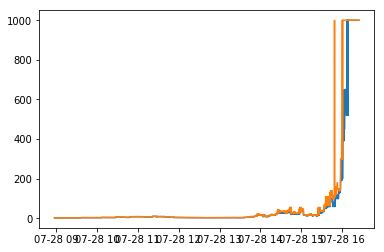

In [28]:
plt.plot(z1.loc[:,['prevBid', 'prevAsk']])


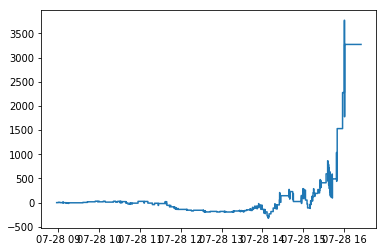

In [29]:
plt.plot(z1.index, np.nancumsum(z1.bidPL +z1.askPL))

In [34]:
'''
# This is done better by the pivot table
# Check if orders are hit before the next tick (wildly slow)
for recordInd, record in myBids.iterrows():
    nextInd = bestAsks.loc[(bestAsks.timestamputc>record.timestamputc), 'timestamputc'].idxmin()
    # Bid is hit if next ask is less than current placed bid
    myBids.loc[recordInd, 'isHit'] = (bestAsks.loc[nextInd, 'odds']< record.odds)
    
for recordInd, record in myAsks.iterrows():
    nextInd = bestBids.loc[(bestBids.timestamputc>record.timestamputc), 'timestamputc'].idxmin()
    # Bid is hit if next ask is less than current placed bid
    myAsks.loc[recordInd, 'isHit'] = (bestBids.loc[nextInd, 'odds']> record.odds)
'''

"\n# This is done better by the pivot table\n# Check if orders are hit before the next tick (wildly slow)\nfor recordInd, record in myBids.iterrows():\n    nextInd = bestAsks.loc[(bestAsks.timestamputc>record.timestamputc), 'timestamputc'].idxmin()\n    # Bid is hit if next ask is less than current placed bid\n    myBids.loc[recordInd, 'isHit'] = (bestAsks.loc[nextInd, 'odds']< record.odds)\n    \nfor recordInd, record in myAsks.iterrows():\n    nextInd = bestBids.loc[(bestBids.timestamputc>record.timestamputc), 'timestamputc'].idxmin()\n    # Bid is hit if next ask is less than current placed bid\n    myAsks.loc[recordInd, 'isHit'] = (bestBids.loc[nextInd, 'odds']> record.odds)\n"

In [213]:
scrapeTS.head() 

37742   2019-07-27 10:45:45.351459
37743   2019-07-27 10:45:45.351459
37744   2019-07-27 10:45:45.351459
37745   2019-07-27 10:45:45.351459
37746   2019-07-27 10:45:45.351459
Name: timestamputc, dtype: datetime64[ns]

In [117]:
events.head()

,eventid,sport,competition,event,starttimestamputc
0,1,Australian Rules,AFL,"{'id': '29182435', 'name': 'Collingwood v Rich...",2019-07-25 23:50:00
1,2,Australian Rules,AFL,"{'id': '29182438', 'name': 'Gold Coast v Essen...",2019-07-27 20:40:00
2,3,Australian Rules,AFL,"{'id': '29182386', 'name': 'Hawthorn v Brisban...",2019-07-26 17:45:00
3,4,Australian Rules,AFL,"{'id': '29182389', 'name': 'Port Adelaide v GW...",2019-07-26 23:40:00


In [126]:
events['event'].apply(lambda x: x['name'])

0    Collingwood v Richmond
1     Gold Coast v Essendon
2       Hawthorn v Brisbane
3       Port Adelaide v GWS
Name: event, dtype: object

In [108]:
markets.marketparameters[0]['source']['betfair']['marketid']

'1.159517196'

In [128]:
set(records.runnerid)

{39977, 39979, 42153, 217710, 4513766, 5304641}

In [129]:
r = records.loc[ (records.marketid==7) & (records.runnerid==217710), :]
r.head()

,recordid,source,marketid,runnerid,timestamputc,handicap,odds,stake,islay,isplaced,notes
37742,37743,betfair,7,217710,2019-07-27 10:45:45.351459,0.0,3.50,100.00,True,False,
37743,37744,betfair,7,217710,2019-07-27 10:45:45.351459,0.0,4.40,298.50,True,False,
37744,37745,betfair,7,217710,2019-07-27 10:45:45.351459,0.0,4.60,61.22,True,False,
37745,37746,betfair,7,217710,2019-07-27 10:45:45.351459,0.0,2.04,1013.68,False,False,
37746,37747,betfair,7,217710,2019-07-27 10:45:45.351459,0.0,2.00,26.31,False,False,


In [160]:
# Determine hits
# Bid hit if the NEXT ask is lower
# Ask hit if the NEXT bid is higher